In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, r2_score, make_scorer, classification_report, confusion_matrix
from sklearn import preprocessing
from math import sqrt
from sklearn.model_selection import train_test_split
import time
from scipy.stats import norm
from tqdm import tqdm

In [2]:
df = pd.read_csv("train.csv")
df.head()

,ID,TS,X01,X02,X03,X04,X05,X06,X07,X08,...,X16,X17,X18,X19,X20,X21,X22,X23,X24,Y
0,1,2018/1/1 0:00,41.83,124.94,263.22,300.57,10.35,10.39,10.32,90.28,...,7.37,18.0,3776.31,24.0,0.05,10.35,7.93,78.01,358689.0,3
1,2,2018/1/1 0:06,41.97,125.30,262.12,300.53,10.33,10.40,10.34,89.50,...,7.40,18.0,3760.59,24.0,0.00,9.67,7.97,78.08,339139.0,3
2,3,2018/1/1 0:12,41.90,125.00,261.45,300.29,10.35,10.41,10.33,89.74,...,7.44,18.0,3754.59,24.0,0.00,9.68,7.98,79.50,326082.0,3
3,4,2018/1/1 0:18,42.33,125.25,262.12,298.94,10.31,10.41,10.33,89.69,...,7.47,18.0,3746.73,8.0,5.28,10.92,7.95,80.07,321295.0,3
4,5,2018/1/1 0:24,42.37,125.03,262.94,301.73,10.33,10.40,10.32,90.20,...,7.50,18.0,3748.58,8.0,4.60,11.12,7.94,79.96,339248.0,2


In [3]:
df2 = pd.read_csv("test.csv")
df2.head()

,ID,TS,X01,X02,X03,X04,X05,X06,X07,X08,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,1,2018/1/1 5:12,41.61,124.91,262.32,300.96,10.36,10.40,10.33,93.21,...,6416.88,7.32,18.0,3605.31,8.0,114.12,26.99,7.94,79.36,314391.0
1,2,2018/1/1 5:42,40.98,125.06,259.96,297.68,10.36,10.42,10.33,86.64,...,6398.13,7.20,18.0,3574.34,30.0,0.00,18.96,7.93,77.41,308945.0
2,3,2018/1/1 5:54,41.55,124.87,261.75,299.36,10.34,10.40,10.33,88.41,...,6396.88,7.27,18.0,3542.92,30.0,0.00,19.77,7.95,79.74,301684.0
3,4,2018/1/1 9:00,41.72,124.96,261.59,297.80,10.34,10.38,10.33,86.41,...,6417.50,8.04,18.0,3436.62,10.0,832.15,40.83,7.91,88.66,287037.0
4,5,2018/1/1 14:18,42.87,125.09,264.50,302.26,10.36,10.23,10.47,90.97,...,6437.50,7.68,22.0,4225.99,13.0,1232.97,6.19,7.84,82.65,308094.0


In [4]:
df.sort_values(['TS'],inplace=True)
df2.sort_values(['TS'],inplace=True)
df.reset_index(drop=True,inplace=True)
df2.reset_index(drop=True,inplace=True)

# Outlier

In [5]:
df.columns

Index(['ID', 'TS', 'X01', 'X02', 'X03', 'X04', 'X05', 'X06', 'X07', 'X08',
       'X09', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'Y'],
      dtype='object')

In [6]:
ttt=df.describe()
MAX=ttt['X01']
a=MAX['mean']
b=MAX['std']
DOWN=a-3*b
UP=a+3*b
leave=len(df[(df['X01']>UP)|(df['X01']<DOWN)])

3 sigamas區間 38.21663017286385 45.615974453487915
離群值個數 130


count    20621.000000
mean        41.916302
std          1.233224
min         26.690000
25%         41.280000
50%         41.890000
75%         42.540000
max         47.910000
Name: X01, dtype: float64

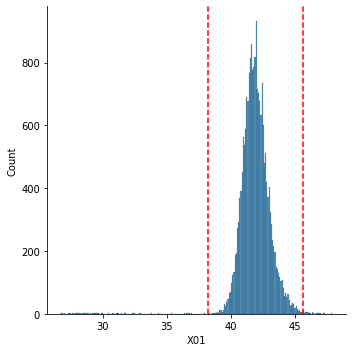

In [7]:
sns.displot(df['X01'],kde=False)
plt.axvline(UP, color='red', linestyle='--')
plt.axvline(DOWN, color='red', linestyle='--')
print("3 sigamas區間", DOWN, UP)
print("離群值個數", leave)
MAX

In [8]:
ttt=df.describe()
MAX=ttt['X10']
a=MAX['mean']
b=MAX['std']
DOWN=a-3*b
UP=a+3*b
leave=len(df[(df['X10']>UP)|(df['X10']<DOWN)])

3 sigamas區間 0.05437498279723485 63.71234729061336
離群值個數 495


count    20621.000000
mean        31.883361
std         10.609662
min          8.220000
25%         26.700000
50%         30.620000
75%         34.840000
max        143.510000
Name: X10, dtype: float64

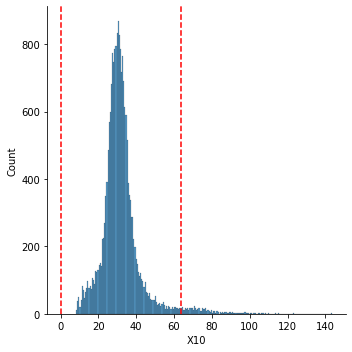

In [9]:
sns.displot(df['X10'],kde=False)
plt.axvline(UP, color='red', linestyle='--')
plt.axvline(DOWN, color='red', linestyle='--')
print("3 sigamas區間", DOWN, UP)
print("離群值個數", leave)
MAX

In [10]:
len(df[df['X10']>110])

5

In [11]:
len(df[df['X01']<37])

71

In [12]:
drop_index1=df[(df['X01']<37)|(df['X10']>110)].index
df.drop(drop_index1,inplace=True)
df.reset_index(drop=True,inplace=True)

In [13]:
df.to_csv("train_20545.csv")

In [14]:
df2.to_csv("Test_fin.csv")